# Iron Condor

주가가 많이 움직일 것 같지 않은 경우의 전략. 제한된 risk 와 제한된 작은 profit 목적. 2 개의 put 과 2 개의 call, 4 개의 행사가로 구성.

목적은 주식의 낮은 변동성에서 이익을 얻는 것. 즉, 만기일에 주가가 중간 행사가에서 끝나면 전략 성공.

* 같은 만기일의 4 개의 다른 행사가로 구성

    - Bull put spread
        1. Buy a 240 strike put for 0.8
        2. Sell a 250 strike put for 2.8
    - Bear call spread
        1. Sell a 260 strike call for 2.4
        2. Buy a 270 strike call for 0.8

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [18]:
def put_payoff(sT, strike_price, premium, contracts=1, multiplier=1):
    pnl = np.where(sT < strike_price, strike_price - sT, 0) - premium
    return pnl * contracts * multiplier

def call_payoff(sT, strike_price, premium, contracts=1, multiplier=1):
    pnl = np.where(sT > strike_price, sT - strike_price, 0) - premium
    return pnl * contracts * multiplier

# Bull Put Spread

Bull call spread : call option 을 사고 동시에 더 높은 행사가의 call option 을 파는 전략. 주식의 작은 상승에서 이익을 얻는 것. 만기일 주가가 높은 행사가 이상으로 오르면 전략 성공

Bull put spread : put option 을 사고 동시에 더 높은 행사가의 put option 을 파는 전략. 주가의 작은 상승에서 이익을 얻는 것. 만기일 주가가 높은 행사가 이상으로 오르면 전략 성공.

# Bear Call Spread

Bear put spread : 풋옵션을 매수하고 동시에 더 낮은 행사가의 풋옵션을 매도. 전략의 목표는 주가의 작은 하락에서 이익을 얻는 것. 만기일 주가가 낮은 행사가 이하로 내리면 전략 성공.

Bear call spread : 콜옵션을 매수하고 동시에 더 낮은 행사가의 콜옵션을 매도. 전략의 목표는 주가의 작은 하락에서 이익을 얻는 것. 만기일 주가가 낮은 행사가 이하로 내리면 전략 성공.



In [19]:
# 현물 가격
spot_price = 255

# 풋옵션 매수
strike_price_long_put = 240
premium_long_put = 0.8

# 더 높은 행사가의 풋옵션 매도
strike_price_short_put = 250
premium_short_put = 2.8

# 콜옵션 매수
strike_price_short_call = 260
premium_short_call = 2.4

# 더 높은 행사가의 콜옵션 매도
strike_price_long_call = 270
premium_long_call = 0.8

# Stock price range at expiration of the call
sT = np.arange(0.9*spot_price,1.1*spot_price,1) 

## Bull Put Spread

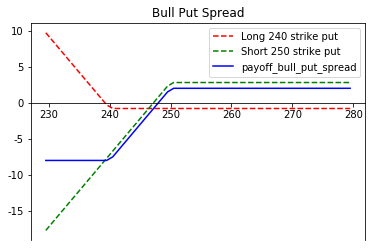

In [24]:
payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
payoff_short_put = -1 * put_payoff(sT, strike_price_short_put, premium_short_put)
payoff_bull_put_spread = payoff_long_put + payoff_short_put

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_long_put, 'r--', label='Long 240 strike put')
ax.plot(sT, payoff_short_put, 'g--', label='Short 250 strike put')
ax.plot(sT, payoff_bull_put_spread, 'b-', label='payoff_bull_put_spread')
plt.legend()
plt.title('Bull Put Spread');

## Bear Call Spread

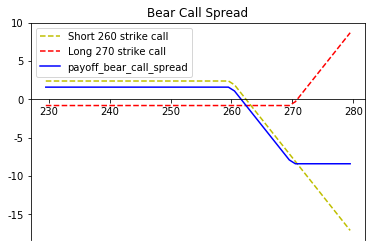

In [25]:
payoff_short_call = -1 * call_payoff(sT, strike_price_short_call, premium_short_call)
payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)
payoff_bear_call_spread = payoff_short_call + payoff_long_call

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_short_call, 'y--', label='Short 260 strike call')
ax.plot(sT, payoff_long_call, 'r--', label='Long 270 strike call')
ax.plot(sT, payoff_bear_call_spread, 'b-', label='payoff_bear_call_spread')
plt.legend();
plt.title('Bear Call Spread');

## Iron Condor

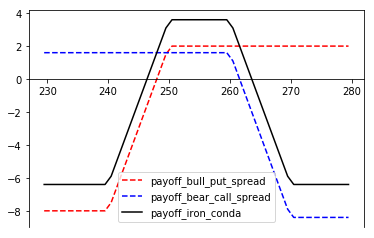

In [26]:
payoff_iron_conda = payoff_bull_put_spread + payoff_bear_call_spread

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_bull_put_spread, 'r--', label='payoff_bull_put_spread')
ax.plot(sT, payoff_bear_call_spread, 'b--', label='payoff_bear_call_spread')
ax.plot(sT, payoff_iron_conda, 'k-', label='payoff_iron_conda')
plt.legend();

최대 이익

1. position 설정시 받은 net credit 으로 한정된다. (2.8 + 2.4 - 0.8 - 0.8 = 3.6)

2. 최대이익은 만기시 주가가 매도한 call 과 put 의 strike price (250, 260) 중간일 때 얻어진다.

최대 손실

1. 이 전략은 주가가 260 이상 혹은 250 이하가 되면 손실을 보기 시작한다.

2. 최대 손실은 주가가 270 이상 혹은 240 이하가 될 때 발생한다.

3. 최대손실 금액 = Spread - Net Premium Received = 10 - 3.6 = 6.4

* 이 전략은 옵션의 내재 변동성이 충분히 커서 선취 프리미엄이 납득할만 해야 하지만, 동시에 strike price 가 충분히 멀어서 in the money 로 가지 않도록 명심해야 한다.